# <center>Kidney Disease Detection</center>

## Overview:
The dataset was collected from PACS (Picture archiving and communication system) from different hospitals in Dhaka, Bangladesh where patients were already diagnosed with having a kidney tumor, cyst, normal or stone findings. Both the Coronal and Axial cuts were selected from both contrast and non-contrast studies with protocol for the whole abdomen and urogram. The Dicom study was then carefully selected, one diagnosis at a time, and from those we created a batch of Dicom images of the region of interest for each radiological finding. Following that, we excluded each patient's information and meta data from the Dicom images and converted the Dicom images to a lossless jpg image format. After the conversion, each image finding was again verified by a radiologist and a medical technologist to reconfirm the correctness of the data.

Types of Things We've taken for Detection:
* Cysts
* Stones
* Tumors

 unique data within it in which the cyst contains 3,709, normal 5,077, stone 1,377, and tumor 2,283

## Dataset Information:

Kidney CT Scan Dataset: [Kaggle - Kidney Disease Detection](https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/data?select=CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone)

This dataset of size 2GB contains 12,446 images of human kidney CT scan images which are classified into 4 classes: Cyst, Normal, Stone, Tumor.

### Training Data:

   * Cyst: 2968 Images
   * Normal: 4062 Images
   * Stone: 1102 Images
   * Tumor: 1827 Images
   
### Testing Data:

   * Cyst: 741 Images
   * Normal: 1015 Images
   * Stone: 275 Images
   * Tumor: 456 Images

# 1. Importing Required Libraries
* ```Numpy```: A fundamental package for scientific computing in Python. It provides support for multidimensional arrays, along with a collection of mathematical functions to operate on these arrays efficiently. NumPy is widely used in numerical and scientific computing tasks, including data manipulation, linear algebra, statistics, and signal processing.

* ```Pandas```: A powerful library for data manipulation and analysis in Python. It offers data structures and functions for working with structured data, primarily in the form of dataframes. Dataframes are two-dimensional labeled arrays capable of holding heterogeneous data types. Pandas provides tools for reading and writing data from various file formats, reshaping and transforming data, and performing data analysis tasks such as grouping, filtering, and aggregation.

* ```PIL (Python Imaging Library)```: Also known as the Pillow library, it is a Python imaging library that adds support for opening, manipulating, and saving many different image file formats. PIL/Pillow provides functions for basic image processing tasks such as resizing, cropping, rotating, and filtering images.

* ```Matplotlib```: A plotting library for creating visualizations in Python. It provides a MATLAB-like interface for generating a wide range of static, interactive, and animated plots. Matplotlib is highly customizable and supports various plot types, including line plots, scatter plots, bar charts, histograms, and heatmaps.

* ```Seaborn```: Built on top of Matplotlib, Seaborn is a statistical data visualization library that provides an easy-to-use interface for creating informative and visually appealing plots. Seaborn simplifies the process of creating complex statistical visualizations by providing high-level functions for common statistical plots such as scatter plots, box plots, violin plots, and pair plots.

* ```Sklearn```: Scikit-learn is a machine learning library for Python that provides simple and efficient tools for data mining and data analysis. It features various supervised and unsupervised learning algorithms, including classification, regression, clustering, dimensionality reduction, and model evaluation.

* ```TensorFlow```: TensorFlow is an open-source machine learning framework developed by Google. It provides a comprehensive ecosystem of tools, libraries, and resources for building and deploying machine learning models at scale.

In [2]:
import warnings
warnings.simplefilter('ignore')

import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model,Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.python.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D

# 2. Data Preprocessing

In [2]:
batch_size,img_height,img_width = 32, 150, 150
data_dir='/kaggle/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

train=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.1,
                                                subset='training',seed=123)

val=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.2,
                                                subset='validation',seed=123)

Found 12446 files belonging to 4 classes.
Using 11202 files for training.
Found 12446 files belonging to 4 classes.
Using 2489 files for validation.


In [3]:
label_to_class_name = dict(zip(range(len(train.class_names)), train.class_names))
label_to_class_name

{0: 'Cyst', 1: 'Normal', 2: 'Stone', 3: 'Tumor'}

In [4]:
train = train.map(lambda x,y:(x/255,y))
val = val.map(lambda x,y:(x/255,y))

# 3. Building Deep Learning Models

## 3.1 Convolutional Neural Network Training and Evaluation

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(train,validation_data=val,epochs=15)

Epoch 1/15


I0000 00:00:1708526717.151070     108 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


351/351 [==============================] - 39s 98ms/step - loss: 0.1296 - accuracy: 0.9567 - val_loss: 0.0064 - val_accuracy: 0.9976
Epoch 2/15
351/351 [==============================] - 4s 13ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 1.6876e-04 - val_accuracy: 1.0000
Epoch 3/15
351/351 [==============================] - 4s 13ms/step - loss: 9.6101e-05 - accuracy: 1.0000 - val_loss: 8.0750e-05 - val_accuracy: 1.0000
Epoch 4/15
351/351 [==============================] - 4s 13ms/step - loss: 5.0290e-05 - accuracy: 1.0000 - val_loss: 4.7480e-05 - val_accuracy: 1.0000
Epoch 5/15
351/351 [==============================] - 4s 13ms/step - loss: 3.0363e-05 - accuracy: 1.0000 - val_loss: 3.0412e-05 - val_accuracy: 1.0000
Epoch 6/15
351/351 [==============================] - 4s 13ms/step - loss: 1.9713e-05 - accuracy: 1.0000 - val_loss: 2.0848e-05 - val_accuracy: 1.0000
Epoch 7/15
351/351 [==============================] - 4s 12ms/step - loss: 1.3476e-05 - accuracy: 1.0000 - val_loss:

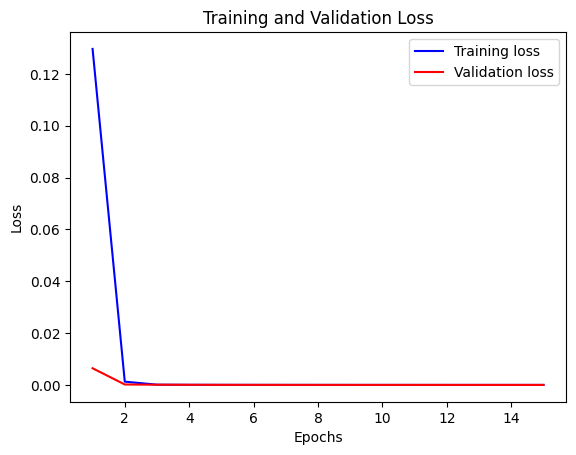

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

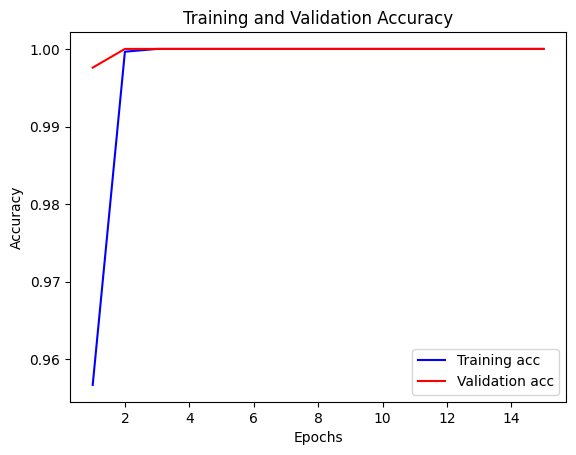

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
y_true_cnn = []
y_pred_cnn = []
for images, labels in val:
    predictions = model.predict(images)
    y_true_cnn.extend(labels.numpy())
    y_pred_cnn.extend(np.argmax(predictions, axis=1))

1/1 [==============================] - 0s 22ms/step


In [38]:
cnn_accuracy = accuracy_score(y_true_cnn, y_pred_cnn)
cnn_precision = precision_score(y_true_cnn, y_pred_cnn, average='weighted')
cnn_recall = recall_score(y_true_cnn, y_pred_cnn, average='weighted')
cnn_f1 = f1_score(y_true_cnn, y_pred_cnn, average='weighted')

print("CNN Model Evaluation:")
print("Accuracy:", cnn_accuracy)
print("Precision:", cnn_precision)
print("Recall:", cnn_recall)
print("F1 Score:", cnn_f1)

CNN Model Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [39]:
cnn_metrics = {
    "Model": ["CNN"],
    "Accuracy": [cnn_accuracy],
    "Precision": [cnn_precision],
    "Recall": [cnn_recall],
    "F1 Score": [cnn_f1]
}
cnn_df = pd.DataFrame(cnn_metrics)
cnn_df

,Model,Accuracy,Precision,Recall,F1 Score
0,CNN,1.0,1.0,1.0,1.0


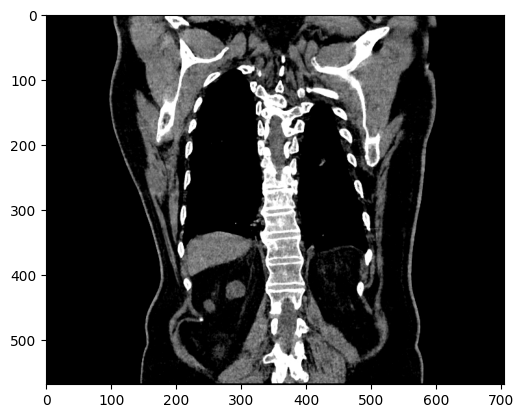

1/1 [==============================] - 0s 201ms/step


'Cyst'

In [11]:
img = cv2.imread('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

## 3.2 VGG-16 Model Training and Evaluation

In [12]:
VGG_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=4,
                   weights='imagenet')


VGG_model.add(pretrained_model)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())  # Batch Normalization layer
VGG_model.add(Dropout(0.5))

VGG_model.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

VGG_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [13]:
VGG_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                      

In [14]:
history = VGG_model.fit(train,validation_data=val,epochs=15)

Epoch 1/15
351/351 [==============================] - 23s 50ms/step - loss: 0.4842 - accuracy: 0.8276 - val_loss: 0.2351 - val_accuracy: 0.9124
Epoch 2/15
351/351 [==============================] - 15s 44ms/step - loss: 0.1788 - accuracy: 0.9367 - val_loss: 0.1054 - val_accuracy: 0.9687
Epoch 3/15
351/351 [==============================] - 15s 44ms/step - loss: 0.1405 - accuracy: 0.9527 - val_loss: 0.1532 - val_accuracy: 0.9405
Epoch 4/15
351/351 [==============================] - 15s 44ms/step - loss: 0.1105 - accuracy: 0.9623 - val_loss: 0.1635 - val_accuracy: 0.9365
Epoch 5/15
351/351 [==============================] - 15s 44ms/step - loss: 0.0965 - accuracy: 0.9670 - val_loss: 0.0748 - val_accuracy: 0.9723
Epoch 6/15
351/351 [==============================] - 15s 43ms/step - loss: 0.0905 - accuracy: 0.9696 - val_loss: 0.0581 - val_accuracy: 0.9831
Epoch 7/15
351/351 [==============================] - 15s 44ms/step - loss: 0.0817 - accuracy: 0.9700 - val_loss: 0.0465 - val_accuracy:

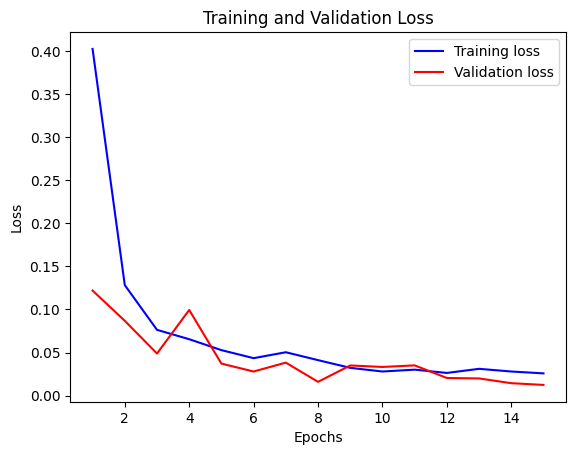

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

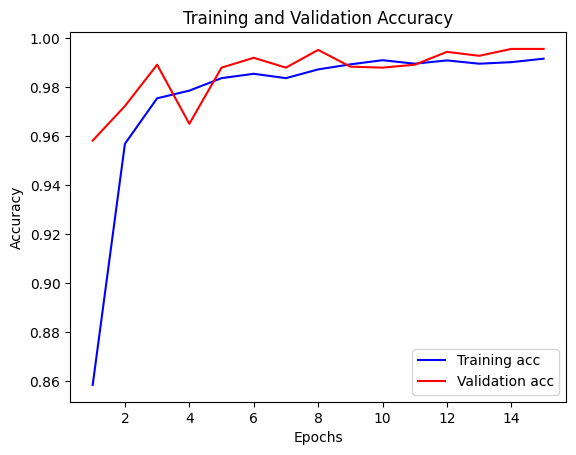

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
y_true_vgg = []
y_pred_vgg = []
for images, labels in val:
    predictions = VGG_model.predict(images)
    y_true_vgg.extend(labels.numpy())
    y_pred_vgg.extend(np.argmax(predictions, axis=1))

1/1 [==============================] - 0s 33ms/step


In [41]:
vgg_accuracy = accuracy_score(y_true_vgg, y_pred_vgg)
vgg_precision = precision_score(y_true_vgg, y_pred_vgg, average='weighted')
vgg_recall = recall_score(y_true_vgg, y_pred_vgg, average='weighted')
vgg_f1 = f1_score(y_true_vgg, y_pred_vgg, average='weighted')

print("\nVGG-16 Model Evaluation:")
print("Accuracy:", vgg_accuracy)
print("Precision:", vgg_precision)
print("Recall:", vgg_recall)
print("F1 Score:", vgg_f1)


VGG-16 Model Evaluation:
Accuracy: 0.9903575733226195
Precision: 0.9905223279998789
Recall: 0.9903575733226195
F1 Score: 0.9902991794850774


In [42]:
vgg_metrics = {
    "Model": ["VGG-16"],
    "Accuracy": [vgg_accuracy],
    "Precision": [vgg_precision],
    "Recall": [vgg_recall],
    "F1 Score": [vgg_f1]
}
vgg_df = pd.DataFrame(vgg_metrics)
vgg_df

,Model,Accuracy,Precision,Recall,F1 Score
0,VGG-16,0.990358,0.990522,0.990358,0.990299


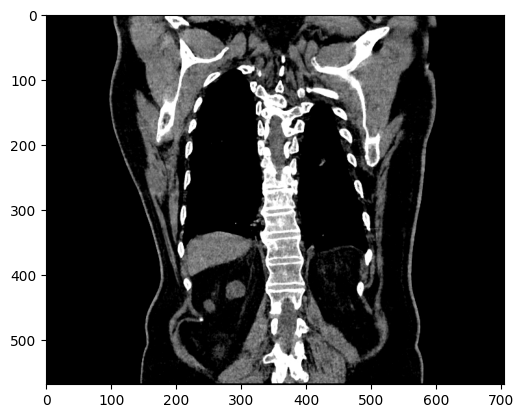

1/1 [==============================] - 1s 505ms/step


'Normal'

In [18]:
img = cv2.imread('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = VGG_model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

## 3.3 MobileNet Model Training and Evaluation

In [19]:
mobile_net = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=4,
                   weights='imagenet')


mobile_net.add(pretrained_model)
mobile_net.add(Flatten())
mobile_net.add(Dense(512, activation='relu'))
mobile_net.add(BatchNormalization())  # Batch Normalization layer
mobile_net.add(Dropout(0.5))

mobile_net.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

9406464/9406464 [==============================] - 0s 0us/step


In [20]:
mobile_net.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
mobile_net.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                

In [22]:
epochs=15
history = mobile_net.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
351/351 [==============================] - 13s 27ms/step - loss: 0.4024 - accuracy: 0.8586 - val_loss: 0.1220 - val_accuracy: 0.9582
Epoch 2/15
351/351 [==============================] - 8s 22ms/step - loss: 0.1283 - accuracy: 0.9569 - val_loss: 0.0869 - val_accuracy: 0.9723
Epoch 3/15
351/351 [==============================] - 8s 21ms/step - loss: 0.0764 - accuracy: 0.9755 - val_loss: 0.0489 - val_accuracy: 0.9892
Epoch 4/15
351/351 [==============================] - 7s 21ms/step - loss: 0.0655 - accuracy: 0.9786 - val_loss: 0.0994 - val_accuracy: 0.9650
Epoch 5/15
351/351 [==============================] - 8s 22ms/step - loss: 0.0528 - accuracy: 0.9837 - val_loss: 0.0372 - val_accuracy: 0.9879
Epoch 6/15
351/351 [==============================] - 8s 21ms/step - loss: 0.0435 - accuracy: 0.9854 - val_loss: 0.0280 - val_accuracy: 0.9920
Epoch 7/15
351/351 [==============================] - 8s 21ms/step - loss: 0.0504 - accuracy: 0.9837 - val_loss: 0.0383 - val_accuracy: 0.987

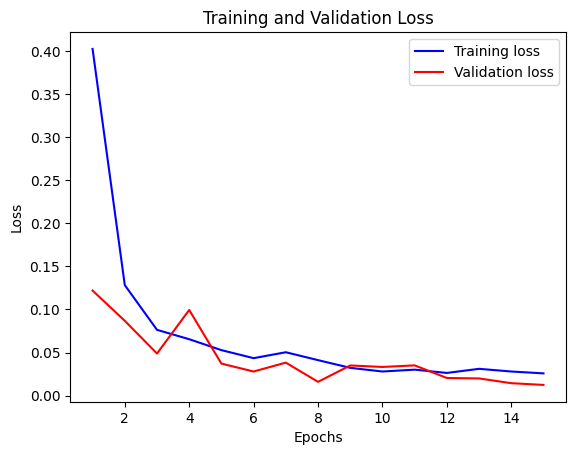

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

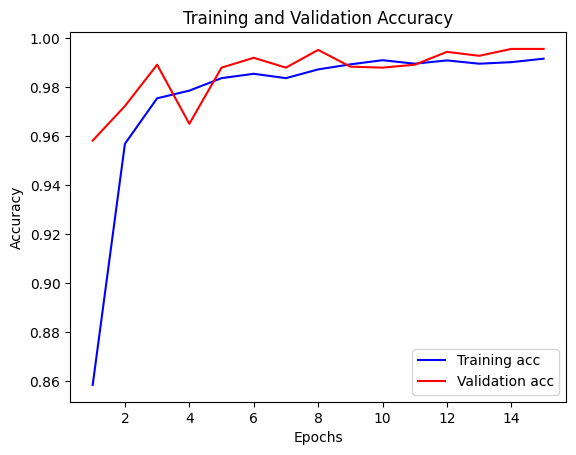

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
y_true_mobile_net = []
y_pred_mobile_net = []
for images, labels in val:
    predictions = mobile_net.predict(images)
    y_true_mobile_net.extend(labels.numpy())
    y_pred_mobile_net.extend(np.argmax(predictions, axis=1))

1/1 [==============================] - 0s 25ms/step


In [44]:
mobile_net_accuracy = accuracy_score(y_true_mobile_net, y_pred_mobile_net)
mobile_net_precision = precision_score(y_true_mobile_net, y_pred_mobile_net, average='weighted')
mobile_net_recall = recall_score(y_true_mobile_net, y_pred_mobile_net, average='weighted')
mobile_net_f1 = f1_score(y_true_mobile_net, y_pred_mobile_net, average='weighted')

print("\nMobileNet Model Evaluation:")
print("Accuracy:", mobile_net_accuracy)
print("Precision:", mobile_net_precision)
print("Recall:", mobile_net_recall)
print("F1 Score:", mobile_net_f1)


MobileNet Model Evaluation:
Accuracy: 0.995580554439534
Precision: 0.995576777732902
Recall: 0.995580554439534
F1 Score: 0.995567382634069


In [45]:
mobile_net_metrics = {
    "Model": ["MobileNet"],
    "Accuracy": [mobile_net_accuracy],
    "Precision": [mobile_net_precision],
    "Recall": [mobile_net_recall],
    "F1 Score": [mobile_net_f1]
}
mobile_net_df = pd.DataFrame(mobile_net_metrics)
mobile_net_df

,Model,Accuracy,Precision,Recall,F1 Score
0,MobileNet,0.995581,0.995577,0.995581,0.995567


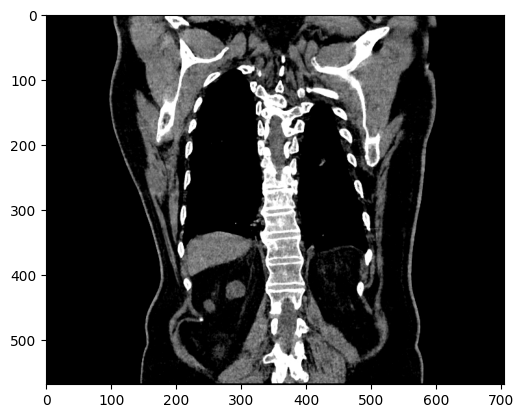

1/1 [==============================] - 1s 1s/step


'Cyst'

In [27]:
img = cv2.imread('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = mobile_net.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

In [36]:
Results = pd.concat([cnn_df, vgg_df, mobile_net_df], ignore_index=True)
Results

,Model,Accuracy,Precision,Recall,F1 Score
0,CNN,1.000000,1.000000,1.000000,1.000000
1,VGG-16,0.990358,0.990522,0.990358,0.990299
2,MobileNet,0.995581,0.995577,0.995581,0.995567


# Saving Model

In [ ]:
model.save("model.h5")

# Testing Model

In [ ]:
img = cv2.imread('CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1000).jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (150,150))
yhat = loaded_model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]